# **NABII-DIMBA TOTAL GOAL COUNT PREDICTIONS**

# Table of Contents

1. ## [Data Cleaning and Preparation](#data-cleaning-and-preparation)
   - [Data Exploration](#data-exploration)
   - [Handling Missing Data](#handling-missing-data)


2. ## [Data Preprocessing](#data-preprocessing)
   - [Addressing Multicollinearity](#addressing-multicollinearity)
   - [Handling Outliers](#handling-outliers)
   - [Log Transformation](#log-transformation)
   - [Defining Variables](#defining-variables)
   - [Train-Test Split](#train-test-split)
   - [Data Scaling/Normalization](#data-scalingnormalization)

   


3. ## [Feature Selection](#feature-selection)
   - [Recursive Feature Elimination](#recursive-feature-elimination)


4. ## [Models](#models)
   - [Introduction to Linear Regression](#introduction-to-regression-models)
   - [Model Selection Criteria](#model-selection-criteria)
   - [Evaluation Metrics](#evaluation-metrics)

5. ## [Baseline Model with Selected Features](#baseline-model-with-selected-features)
   - [Model Training with Selected Features](#model-training-with-basic-features)
   - [Intial Performance Assessment](#initial-performance-assessment)


6. ## [Ridge Regression](#ridge-regression)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Performance Evaluation](#performance-evaluation)

7. ## [Random Forest Regressor](#random-forest-regressor)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Feature Importance Analysis](#feature-importance-analysis)
   - [Performance Evaluation](#performance-evaluation)

8. ## [XGBoost Regressor](#xgboost-regressor)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Feature Importance Analysis](#feature-importance-analysis)
   - [Performance Evaluation](#performance-evaluation)

9. ## [Support Vector Regressor (SVR)](#support-vector-regressor-svr)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Performance Evaluation](#performance-evaluation)

10. ## [Deep Neural Networks](#deep-neural-networks)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Performance Evaluation](#performance-evaluation)

11. ## [Conclusions](#conclusions)
    - [Model Comparison](#model-comparison)
    - [Recommendations](#recommendations)



# **Data Cleaning and Preparation**


#### Data Exploration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import tensorflow as tf
from xgboost import plot_importance
from xgboost import plot_tree
from tensorflow.keras.callbacks import TensorBoard
from math import sqrt
#from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
# load data from file
data = pd.read_csv('match_data_avg_stats.csv', header=0)

# inspect the dataframe
data.head()

,id,homeID,awayID,home_name,away_name,date,season,status,homeGoalCount,awayGoalCount,...,npxGD_home,npxGD_away,ppda.att_home,ppda.att_away,ppda.def_home,ppda.def_away,ppda_allowed.att_home,ppda_allowed.att_away,ppda_allowed.def_home,ppda_allowed.def_away
0,2155,150,108,Hull City,Leicester City,2016-08-13,2016/2017,complete,2,1,...,-0.002514,0.746946,280.333333,238.133333,20.133333,25.733333,185.066667,168.266667,20.933333,22.666667
1,2156,145,154,Burnley,Swansea City,2016-08-13,2016/2017,complete,0,1,...,-0.487157,-0.481071,274.466667,217.933333,23.600000,28.000000,179.533333,256.466667,20.266667,26.333333
2,2157,143,142,Crystal Palace,West Bromwich Albion,2016-08-13,2016/2017,complete,0,1,...,-0.217585,-0.226096,208.266667,260.933333,23.866667,24.466667,182.666667,137.866667,24.866667,21.866667
3,2158,144,92,Everton,Tottenham Hotspur,2016-08-13,2016/2017,complete,1,1,...,-0.296455,0.883062,208.533333,169.133333,21.800000,26.600000,250.666667,270.600000,24.800000,24.266667
4,2159,147,141,Middlesbrough,Stoke City,2016-08-13,2016/2017,complete,1,1,...,NaN,-0.516701,NaN,221.800000,NaN,22.866667,NaN,241.000000,NaN,25.066667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6460 non-null   int64  
 1   homeID                 6460 non-null   int64  
 2   awayID                 6460 non-null   int64  
 3   home_name              6460 non-null   object 
 4   away_name              6460 non-null   object 
 5   date                   6460 non-null   object 
 6   season                 6460 non-null   object 
 7   status                 6460 non-null   object 
 8   homeGoalCount          6460 non-null   int64  
 9   awayGoalCount          6460 non-null   int64  
 10  totalGoalCount         6460 non-null   int64  
 11  team_a_cards_num       6460 non-null   int64  
 12  team_b_cards_num       6460 non-null   int64  
 13  odds_ft_1              6460 non-null   float64
 14  odds_ft_x              6460 non-null   float64
 15  odds

In [4]:
# drop matches with "incomplete" or "suspended" status
data = data[data['status'] == 'complete']

In [5]:
# check shape of data
data.shape

(6278, 49)

In [6]:
# Get the shape (number of rows and columns) where the 'team_a_xg_prematch' column is equal to 0
data[data['team_a_xg_prematch']==0].shape

(3609, 49)

In [7]:
# Get the shape (number of rows and columns) where the 'team_b_xg_prematch' column is equal to 0
data[data['team_b_xg_prematch']==0].shape

(3609, 49)

In [8]:
# Get the shape (number of rows and columns) where the 'total_xg_prematch' column is equal to 0
data[data['total_xg_prematch']==0].shape

(3603, 49)

#### Handling Missing Values

In [9]:
# check entries with values == 0
columns_to_drop = ['team_a_xg_prematch', 'team_b_xg_prematch', 'total_xg_prematch']


In [10]:
# drop columns with missing values
data.drop(columns=columns_to_drop, inplace=True)

<ipython-input-10-f1878ef2c43b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_drop, inplace=True)


In [11]:
# inspect the first few rows of data dataframe
data.head()

,id,homeID,awayID,home_name,away_name,date,season,status,homeGoalCount,awayGoalCount,...,npxGD_home,npxGD_away,ppda.att_home,ppda.att_away,ppda.def_home,ppda.def_away,ppda_allowed.att_home,ppda_allowed.att_away,ppda_allowed.def_home,ppda_allowed.def_away
0,2155,150,108,Hull City,Leicester City,2016-08-13,2016/2017,complete,2,1,...,-0.002514,0.746946,280.333333,238.133333,20.133333,25.733333,185.066667,168.266667,20.933333,22.666667
1,2156,145,154,Burnley,Swansea City,2016-08-13,2016/2017,complete,0,1,...,-0.487157,-0.481071,274.466667,217.933333,23.600000,28.000000,179.533333,256.466667,20.266667,26.333333
2,2157,143,142,Crystal Palace,West Bromwich Albion,2016-08-13,2016/2017,complete,0,1,...,-0.217585,-0.226096,208.266667,260.933333,23.866667,24.466667,182.666667,137.866667,24.866667,21.866667
3,2158,144,92,Everton,Tottenham Hotspur,2016-08-13,2016/2017,complete,1,1,...,-0.296455,0.883062,208.533333,169.133333,21.800000,26.600000,250.666667,270.600000,24.800000,24.266667
4,2159,147,141,Middlesbrough,Stoke City,2016-08-13,2016/2017,complete,1,1,...,NaN,-0.516701,NaN,221.800000,NaN,22.866667,NaN,241.000000,NaN,25.066667


In [12]:
def winningTeam(row):
    # Extracting the goal counts for the home and away teams from the row
    homeGoalCount = row['homeGoalCount']
    awayGoalCount = row['awayGoalCount']

    # Checking which team won based on the goal counts
    if homeGoalCount > awayGoalCount:
        return 1  # 1 means home team won
    elif awayGoalCount > homeGoalCount:
        return 2  # 2 means away team won
    else:
        return 0  # 0 indicates a draw


In [13]:
# Apply the winningTeam function to each row of the dataframe
data['1x2'] = data.apply(lambda row: winningTeam(row), axis=1)

In [14]:
# check for missing values in the ppg columns
data[data['away_ppg']==0].shape

(0, 47)

In [15]:
data[data['odds_ft_1']==0].shape

(1915, 47)

In [16]:
# check shape of dataframe
data.shape

(6278, 47)

In [17]:
# drop entries where odds is zero
cleaned_data = data.drop(index=data[data['odds_ft_1']==0].index)

In [18]:
# check size of new dataframe
cleaned_data.shape

(4363, 47)

In [19]:
# inspect column to check that entries with zeros have been dropped
cleaned_data.head()

,id,homeID,awayID,home_name,away_name,date,season,status,homeGoalCount,awayGoalCount,...,npxGD_away,ppda.att_home,ppda.att_away,ppda.def_home,ppda.def_away,ppda_allowed.att_home,ppda_allowed.att_away,ppda_allowed.def_home,ppda_allowed.def_away,1x2
0,2155,150,108,Hull City,Leicester City,2016-08-13,2016/2017,complete,2,1,...,0.746946,280.333333,238.133333,20.133333,25.733333,185.066667,168.266667,20.933333,22.666667,1
1,2156,145,154,Burnley,Swansea City,2016-08-13,2016/2017,complete,0,1,...,-0.481071,274.466667,217.933333,23.600000,28.000000,179.533333,256.466667,20.266667,26.333333,2
2,2157,143,142,Crystal Palace,West Bromwich Albion,2016-08-13,2016/2017,complete,0,1,...,-0.226096,208.266667,260.933333,23.866667,24.466667,182.666667,137.866667,24.866667,21.866667,2
3,2158,144,92,Everton,Tottenham Hotspur,2016-08-13,2016/2017,complete,1,1,...,0.883062,208.533333,169.133333,21.800000,26.600000,250.666667,270.600000,24.800000,24.266667,0
4,2159,147,141,Middlesbrough,Stoke City,2016-08-13,2016/2017,complete,1,1,...,-0.516701,NaN,221.800000,NaN,22.866667,NaN,241.000000,NaN,25.066667,0


In [20]:
# get dataframe info
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 0 to 6279
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4363 non-null   int64  
 1   homeID                 4363 non-null   int64  
 2   awayID                 4363 non-null   int64  
 3   home_name              4363 non-null   object 
 4   away_name              4363 non-null   object 
 5   date                   4363 non-null   object 
 6   season                 4363 non-null   object 
 7   status                 4363 non-null   object 
 8   homeGoalCount          4363 non-null   int64  
 9   awayGoalCount          4363 non-null   int64  
 10  totalGoalCount         4363 non-null   int64  
 11  team_a_cards_num       4363 non-null   int64  
 12  team_b_cards_num       4363 non-null   int64  
 13  odds_ft_1              4363 non-null   float64
 14  odds_ft_x              4363 non-null   float64
 15  odds

In [21]:
# Define a list of columns to be dropped from the DataFrame
columns_to_drop = ['id', 'homeID', 'awayID', 'date',
                   'status','season','home_name','away_name']

# Drop the specified columns from the DataFrame
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

In [22]:
# inspect cleaned dataset to confirm columns were dropped successfully
cleaned_data.head()

,homeGoalCount,awayGoalCount,totalGoalCount,team_a_cards_num,team_b_cards_num,odds_ft_1,odds_ft_x,odds_ft_2,home_ppg,away_ppg,...,npxGD_away,ppda.att_home,ppda.att_away,ppda.def_home,ppda.def_away,ppda_allowed.att_home,ppda_allowed.att_away,ppda_allowed.def_home,ppda_allowed.def_away,1x2
0,2,1,3,2,2,3.41,3.19,2.39,1.47,0.53,...,0.746946,280.333333,238.133333,20.133333,25.733333,185.066667,168.266667,20.933333,22.666667,1
1,0,1,1,3,2,2.45,3.22,3.26,1.74,0.74,...,-0.481071,274.466667,217.933333,23.600000,28.000000,179.533333,256.466667,20.266667,26.333333,2
2,0,1,1,2,2,2.20,3.25,3.80,1.05,0.84,...,-0.226096,208.266667,260.933333,23.866667,24.466667,182.666667,137.866667,24.866667,21.866667,2
3,1,1,2,0,0,3.13,3.36,2.45,2.26,1.74,...,0.883062,208.533333,169.133333,21.800000,26.600000,250.666667,270.600000,24.800000,24.266667,0
4,1,1,2,3,5,2.49,3.20,3.21,0.95,0.89,...,-0.516701,NaN,221.800000,NaN,22.866667,NaN,241.000000,NaN,25.066667,0


In [23]:
cleaned_data.columns

Index(['homeGoalCount', 'awayGoalCount', 'totalGoalCount', 'team_a_cards_num',
       'team_b_cards_num', 'odds_ft_1', 'odds_ft_x', 'odds_ft_2', 'home_ppg',
       'away_ppg', 'xG_home', 'xG_away', 'xGA_home', 'xGA_away', 'npxG_home',
       'npxG_away', 'npxGA_home', 'npxGA_away', 'deep_home', 'deep_away',
       'deep_allowed_home', 'deep_allowed_away', 'scored_home', 'scored_away',
       'missed_home', 'missed_away', 'xpts_home', 'xpts_away', 'npxGD_home',
       'npxGD_away', 'ppda.att_home', 'ppda.att_away', 'ppda.def_home',
       'ppda.def_away', 'ppda_allowed.att_home', 'ppda_allowed.att_away',
       'ppda_allowed.def_home', 'ppda_allowed.def_away', '1x2'],
      dtype='object')

# **Data Preprocessing**




#### Addressing Multicollinearity

Let's commence by visualizing the correlation among our variables to assess the presence of multicollinearity.

In [24]:
correlation_matrix = cleaned_data.corr()

# Set a correlation threshold
correlation_threshold = 0.8

# Find highly correlated features
highly_correlated_features = np.where(np.abs(correlation_matrix) > correlation_threshold)

# Get unique feature pairs to avoid duplication
unique_correlations = [(correlation_matrix.columns[i], correlation_matrix.columns[j])
                       for i, j in zip(*highly_correlated_features) if i != j and i < j]

print("Highly Correlated Feature Pairs:")
for feature_pair in unique_correlations:
    print(f"{feature_pair[0]} and {feature_pair[1]} with correlation {correlation_matrix.loc[feature_pair[0], feature_pair[1]]}")

Highly Correlated Feature Pairs:
xG_home and npxG_home with correlation 0.9787986890619094
xG_home and scored_home with correlation 0.8066274315584004
xG_home and xpts_home with correlation 0.9272681154140269
xG_home and npxGD_home with correlation 0.8917338582276392
xG_away and npxG_away with correlation 0.9818890239203775
xG_away and deep_away with correlation 0.8124182746703845
xG_away and scored_away with correlation 0.8439537328517361
xG_away and xpts_away with correlation 0.9007591915182475
xG_away and npxGD_away with correlation 0.8908099582254925
xGA_home and npxGA_home with correlation 0.9753020537276816
xGA_home and xpts_home with correlation -0.8343917026353326
xGA_home and npxGD_home with correlation -0.8696621179776999
xGA_away and npxGA_away with correlation 0.9755288175520958
xGA_away and xpts_away with correlation -0.8262181500007901
xGA_away and npxGD_away with correlation -0.8357524803489859
npxG_home and scored_home with correlation 0.8187187911236212
npxG_home and x

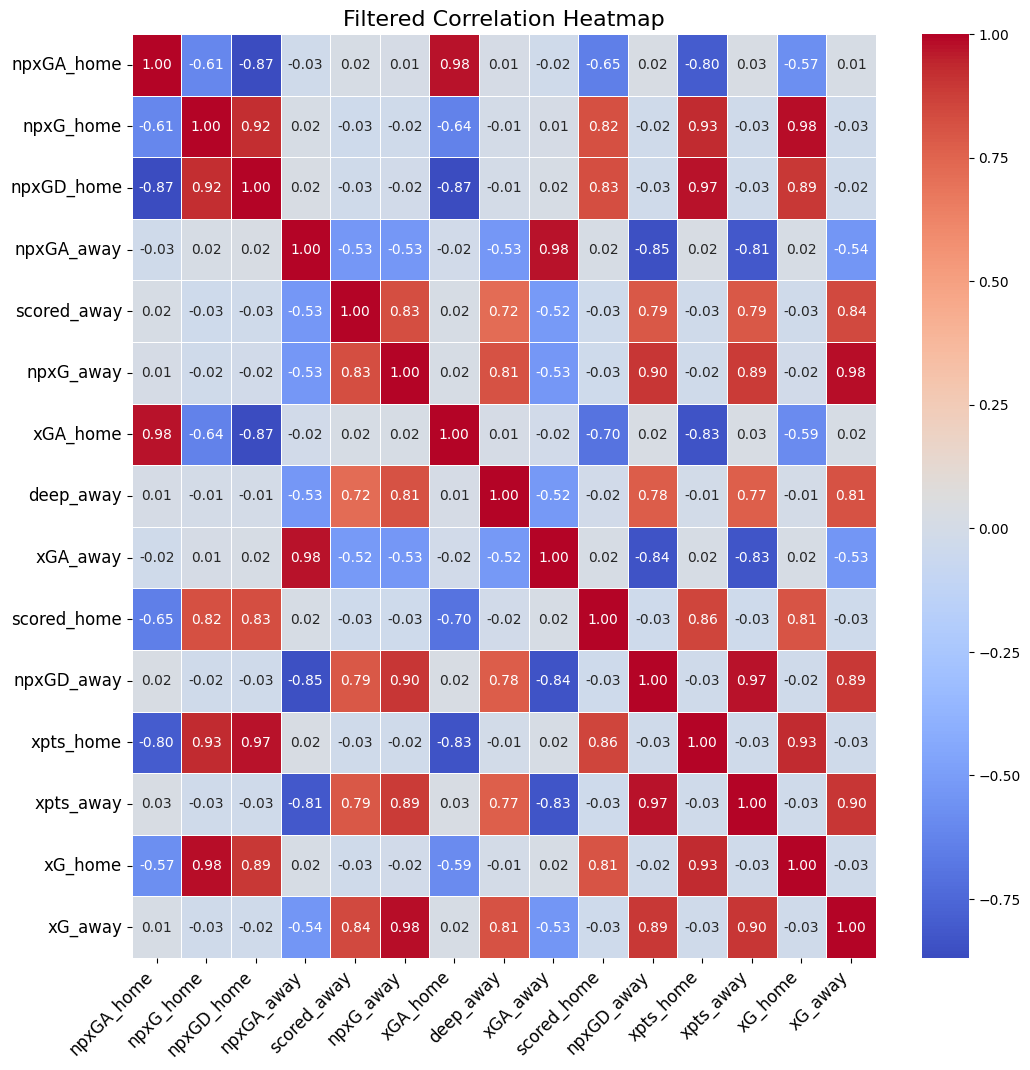

In [25]:
# create a new DataFrame with only the selected features
selected_features = list(set(feature for pair in unique_correlations for feature in pair))
filtered_data = cleaned_data[selected_features]

# Visualize the filtered correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Filtered Correlation Heatmap", fontsize=16)
plt.show()

The observed correlation analysis reveals significant associations among our features:

- "odds_ft_x" and "odds_ft_2" exhibit a correlation of 0.81, indicating a substantial linear relationship.
- "xG_home" showcases high correlation with various features, such as "npxG_home" (correlation of 0.98), "scored_home" (correlation of 0.80), and "xpts_home" (correlation of 0.93).
- Similarly, "xG_away" exhibits strong correlations with "npxG_away" (correlation of 0.98), "deep_away" (correlation of 0.81), and others.

Additionally, certain defensive metrics like "xGA_home" and "xGA_away" display strong negative correlations with their corresponding offensive counterparts, indicating an inverse relationship.

These findings emphasize the presence of multicollinearity among the features, suggesting potential redundancies or interdependencies.

To mitigate multicollinearity, we will leverage Recursive Feature Elimination (RFE) to intelligently select a subset of features. In addition, during the model development phase, we will incorporate regularization techniques. This entails carefully choosing a subset of features or applying regularization methods to enhance the stability and interpretability of our models in the presence of correlated predictors.

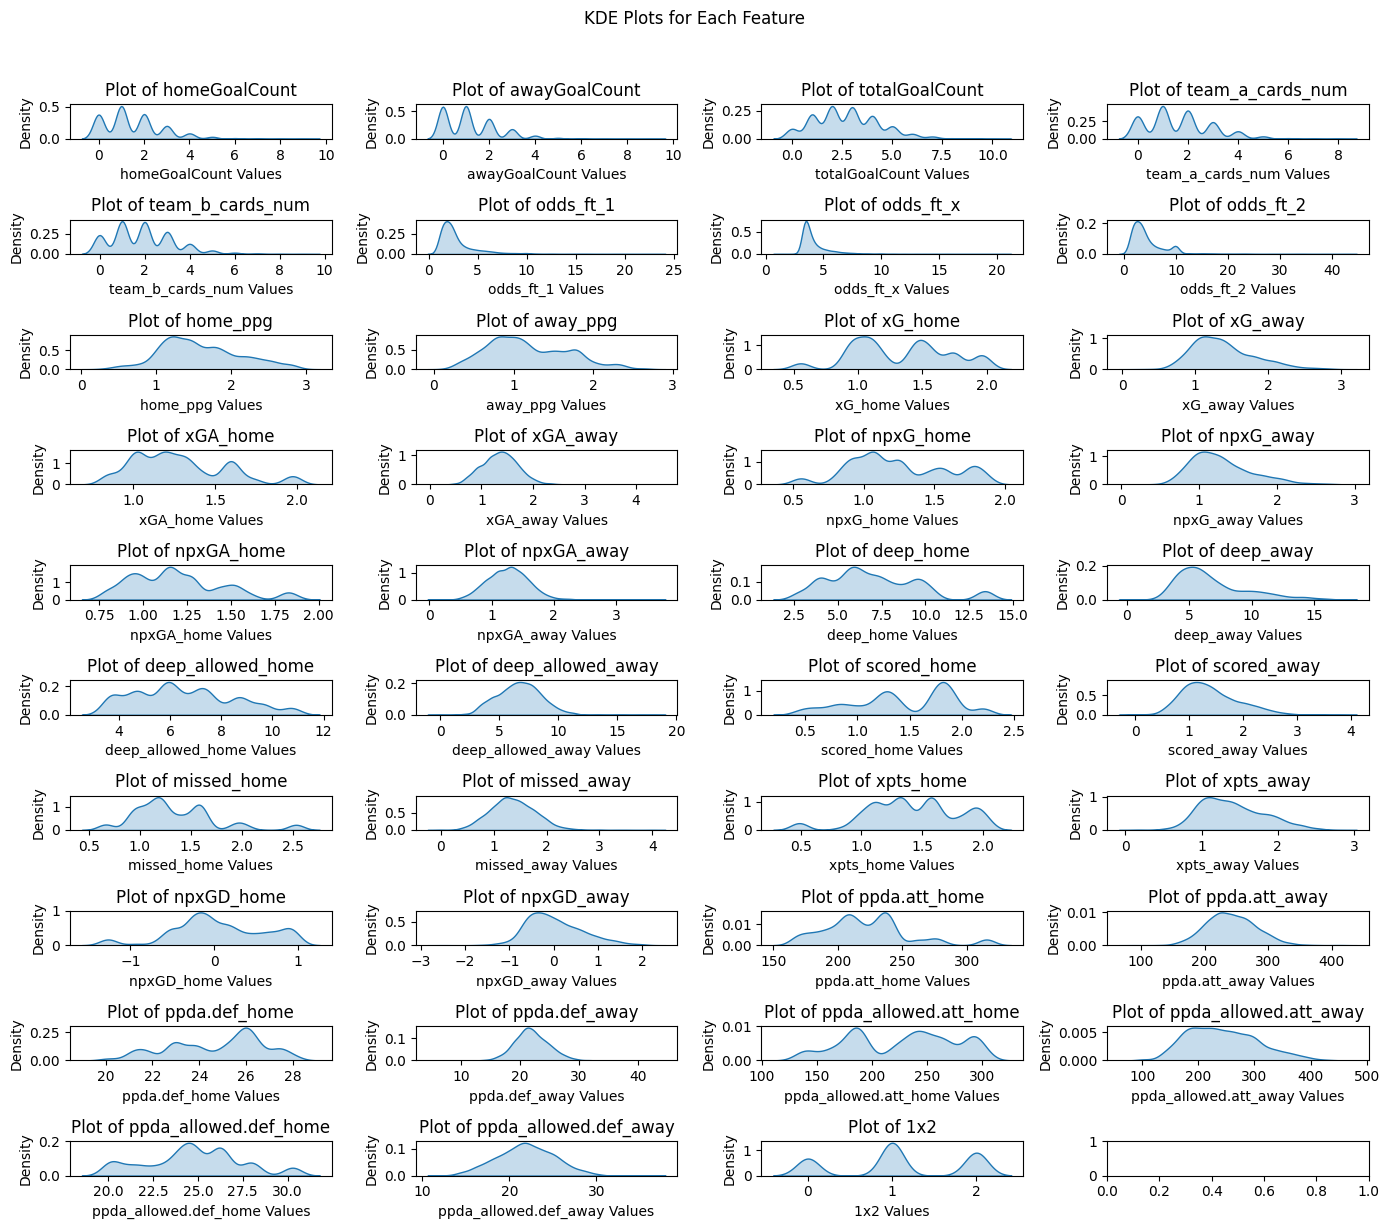

In [26]:
features = cleaned_data.columns.tolist()

# Set up subplots
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(14, 12))
fig.suptitle('KDE Plots for Each Feature', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and create KDE plots or count plots
for i, feature in enumerate(features):
    if cleaned_data[feature].dtype == 'O':
        sns.countplot(x=feature, data=cleaned_data, ax=axes[i])
    else:
        sns.kdeplot(x=cleaned_data[feature], fill=True, ax=axes[i])

    axes[i].set_title(f'Plot of {feature}')
    axes[i].set_xlabel(f'{feature} Values')
    axes[i].set_ylabel('Density' if cleaned_data[feature].dtype != 'O' else 'Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The majority of features in the dataset display characteristics not consistent with a normal distribution.

#### Handling Outliers

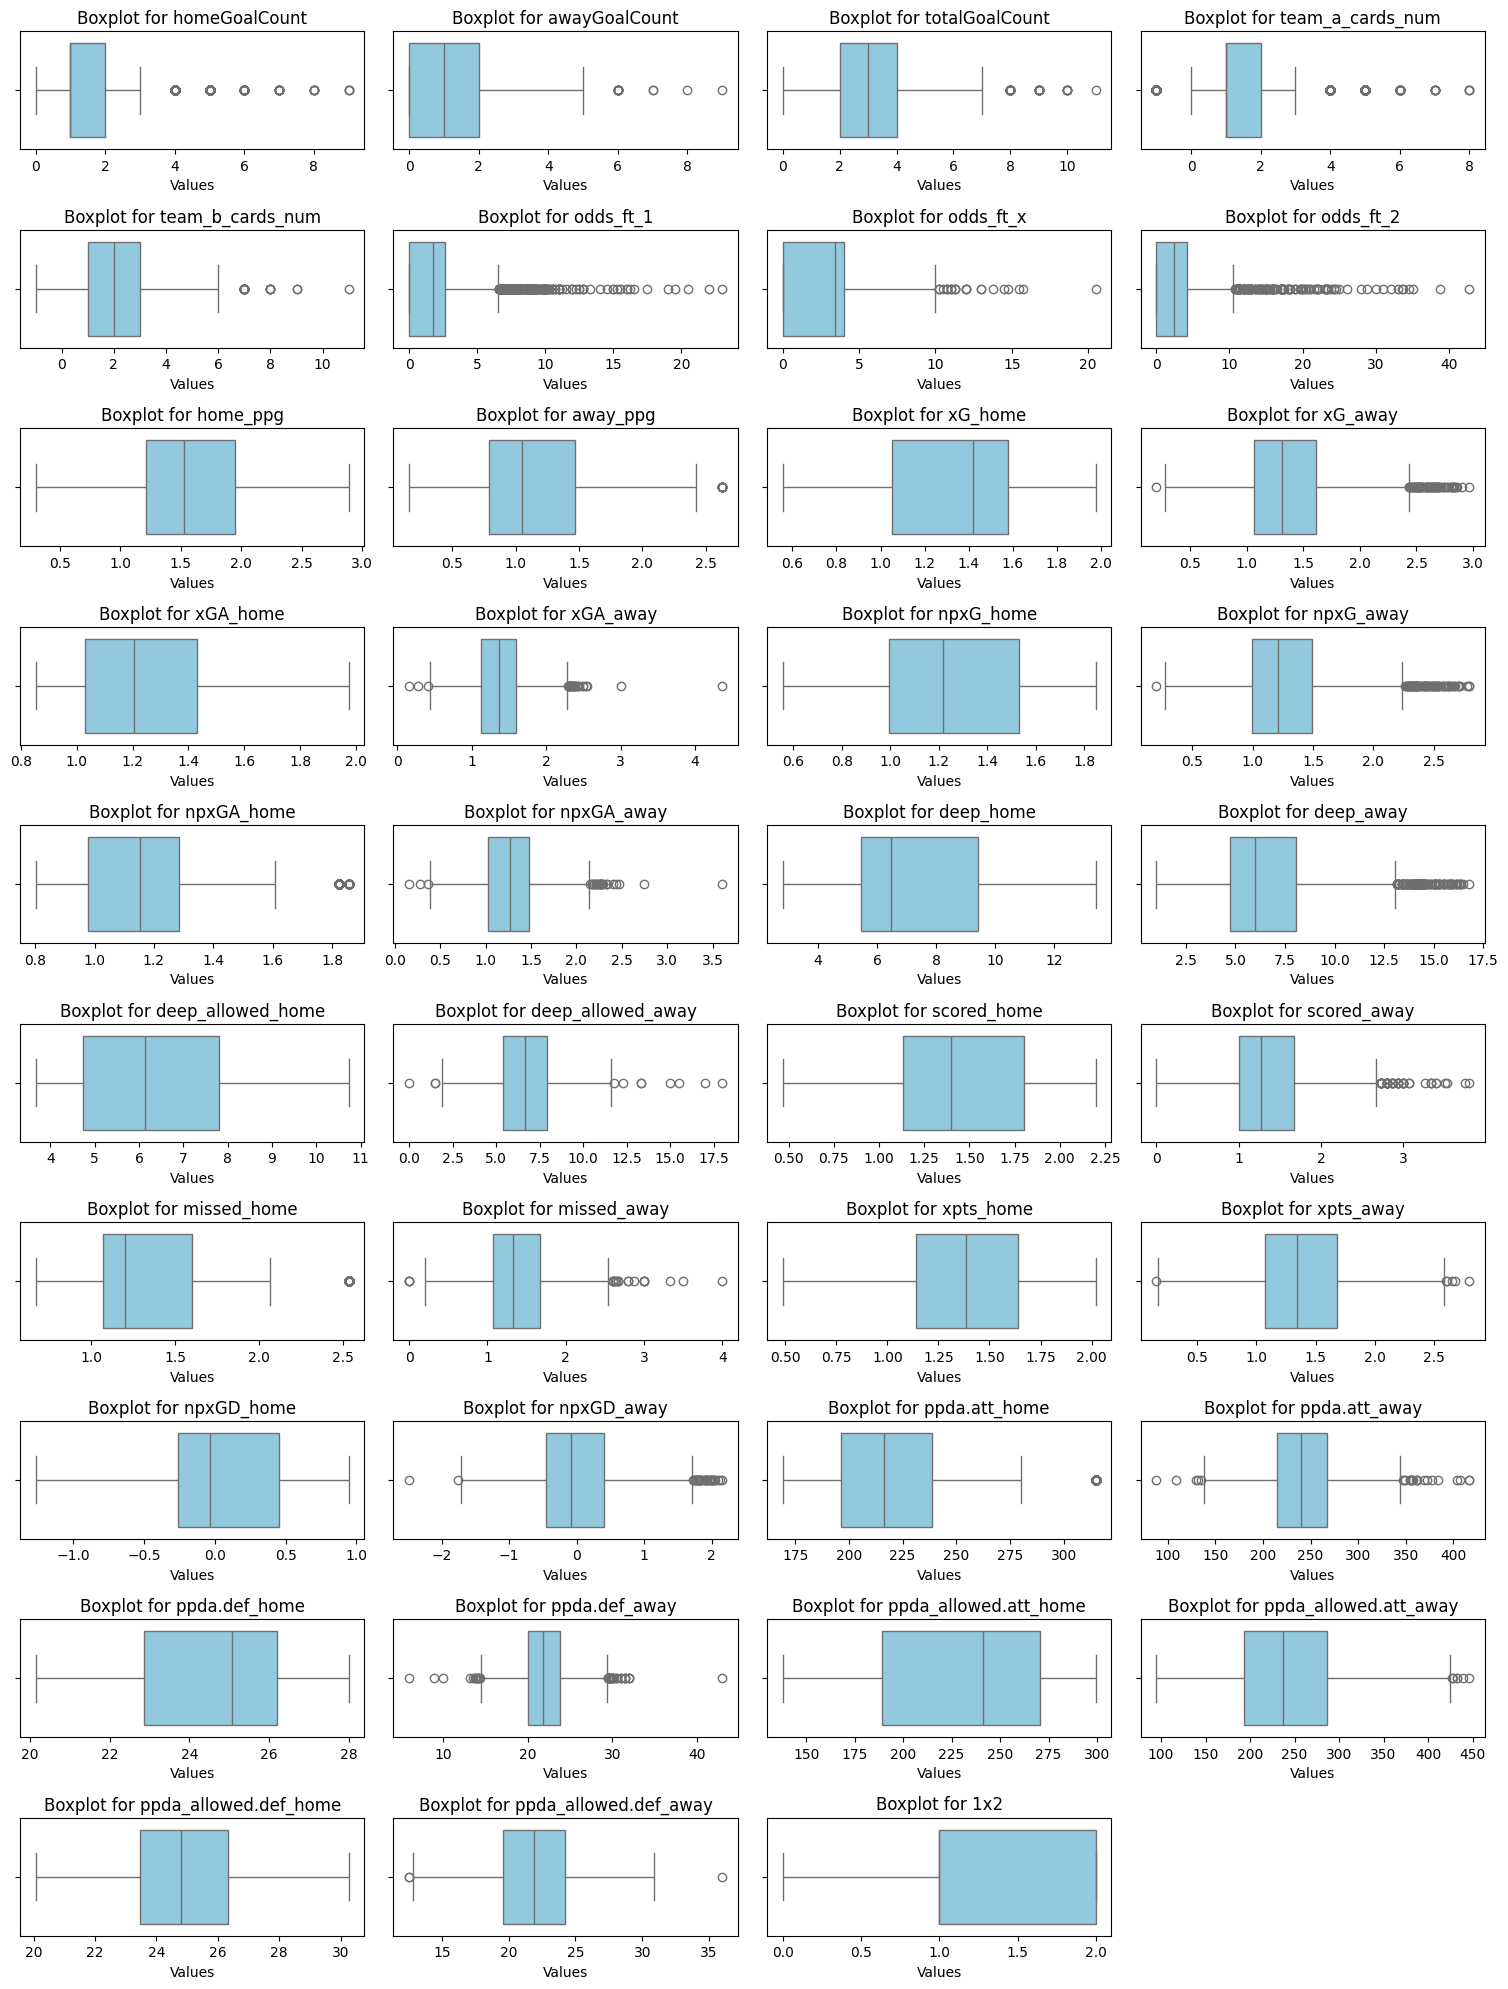

In [27]:

features = cleaned_data.columns

# Create individual boxplots for each feature
plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(10, 4, i)  # Adjust the subplot grid based on the number of features
    sns.boxplot(x=data[feature], color='skyblue')
    plt.title(f'Boxplot for {feature}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

We will address outliers present in both our features and target variable by implementing a log transformation on the dataset. Following this, we will apply standard scaling to mitigate the impact of outliers.

#### Log Transformation

In [28]:
# Log transformation on all numeric columns
cleaned_data = cleaned_data.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)
cleaned_data


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,homeGoalCount,awayGoalCount,totalGoalCount,team_a_cards_num,team_b_cards_num,odds_ft_1,odds_ft_x,odds_ft_2,home_ppg,away_ppg,...,npxGD_away,ppda.att_home,ppda.att_away,ppda.def_home,ppda.def_away,ppda_allowed.att_home,ppda_allowed.att_away,ppda_allowed.def_home,ppda_allowed.def_away,1x2
0,1.098612,0.693147,1.386294,1.098612,1.098612,1.483875,1.432701,1.220830,0.904218,0.425268,...,0.557869,5.639540,5.477021,3.050852,3.285911,5.226105,5.131475,3.088008,3.164068,0.693147
1,0.000000,0.693147,0.693147,1.386294,1.098612,1.238374,1.439835,1.449269,1.007958,0.553885,...,-0.655989,5.618467,5.388767,3.202746,3.367296,5.195915,5.550890,3.057141,3.308107,1.098612
2,0.000000,0.693147,0.693147,1.098612,1.098612,1.163151,1.446919,1.568616,0.717840,0.609766,...,-0.256308,5.343609,5.568090,3.213528,3.237370,5.213123,4.933514,3.252955,3.129680,1.098612
3,0.693147,0.693147,1.098612,0.000000,0.000000,1.418277,1.472472,1.238374,1.181727,1.007958,...,0.632899,5.344883,5.136582,3.126761,3.317816,5.528105,5.604330,3.250374,3.229486,0.000000
4,0.693147,0.693147,1.098612,1.386294,1.791759,1.249902,1.435085,1.437463,0.667829,0.636577,...,-0.727119,NaN,5.406275,NaN,3.172483,NaN,5.488938,NaN,3.260657,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,1.098612,0.000000,1.098612,0.693147,0.693147,0.722706,2.564949,3.583519,1.202972,0.182322,...,NaN,5.380819,5.780538,3.348734,3.141275,5.576959,5.065544,3.305665,2.982309,0.693147
6276,1.098612,0.693147,1.386294,1.098612,1.609438,1.391282,1.526056,1.181727,0.788457,0.832909,...,-0.688391,NaN,5.495254,NaN,3.072693,NaN,5.548557,NaN,3.008978,0.693147
6277,1.386294,0.693147,1.609438,1.386294,1.098612,0.951658,1.731656,1.791759,1.131402,0.832909,...,0.090526,5.136582,5.641671,3.317816,3.234749,5.604330,5.261999,3.229486,3.180828,0.693147
6278,0.000000,0.000000,0.000000,0.693147,0.000000,1.220830,1.578979,1.329724,1.029619,0.788457,...,0.164482,5.323660,5.378975,3.298303,3.149883,5.441552,5.966489,3.232121,3.208152,0.000000


In [29]:
# check for null values
cleaned_data.isnull().sum()

homeGoalCount              0
awayGoalCount              0
totalGoalCount             0
team_a_cards_num           0
team_b_cards_num           0
odds_ft_1                  0
odds_ft_x                  0
odds_ft_2                  0
home_ppg                   0
away_ppg                   0
xG_home                  659
xG_away                  774
xGA_home                 659
xGA_away                 774
npxG_home                659
npxG_away                774
npxGA_home               659
npxGA_away               774
deep_home                659
deep_away                774
deep_allowed_home        659
deep_allowed_away        774
scored_home              659
scored_away              774
missed_home              659
missed_away              774
xpts_home                659
xpts_away                774
npxGD_home               821
npxGD_away               862
ppda.att_home            659
ppda.att_away            774
ppda.def_home            659
ppda.def_away            774
ppda_allowed.a

In [30]:
# drop null values
cleaned_data.dropna(inplace=True)

In [31]:
# cleaned_data = cleaned_data[cleaned_data['totalGoalCount'] < 8]

In [32]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 6278
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   homeGoalCount          2835 non-null   float64
 1   awayGoalCount          2835 non-null   float64
 2   totalGoalCount         2835 non-null   float64
 3   team_a_cards_num       2835 non-null   float64
 4   team_b_cards_num       2835 non-null   float64
 5   odds_ft_1              2835 non-null   float64
 6   odds_ft_x              2835 non-null   float64
 7   odds_ft_2              2835 non-null   float64
 8   home_ppg               2835 non-null   float64
 9   away_ppg               2835 non-null   float64
 10  xG_home                2835 non-null   float64
 11  xG_away                2835 non-null   float64
 12  xGA_home               2835 non-null   float64
 13  xGA_away               2835 non-null   float64
 14  npxG_home              2835 non-null   float64
 15  npxG

#### Defining Variables

In [33]:
# defining target and feature variables
target = cleaned_data[["totalGoalCount"]]
features = cleaned_data.drop(columns = ["totalGoalCount",'homeGoalCount', 'awayGoalCount',
                   'team_a_cards_num', 'team_b_cards_num','1x2'],axis = 1)


#### Train-Test Split

In [34]:
# split our dataset
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.20,random_state = 42)

In [35]:
# instantiate a scaler
scaler = StandardScaler()

# fit and transform the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Feature Selection**

Commencing with the establishment of a baseline model, we opt for Linear Regression.

In [36]:
# baseline model
lr = LinearRegression()

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes features from the dataset while fitting a model on the remaining features. The main idea behind RFE is to repeatedly train a model, evaluate the importance of each feature, and eliminate the least important features until the desired number of features is reached.


In [37]:
# recursive feature elimination
rfe = RFE(estimator = lr,step = 2)
# fit the model
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LinearRegression(), step=2)

In [38]:
rfe.n_features_

16

In [39]:
rfe.support_

array([False,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True])

In [40]:
#selected columns
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['odds_ft_x', 'odds_ft_2', 'xG_home', 'xG_away', 'xGA_home',
       'npxGA_home', 'deep_home', 'deep_away', 'scored_home', 'scored_away',
       'missed_home', 'xpts_home', 'xpts_away', 'ppda.att_away',
       'ppda.def_home', 'ppda_allowed.def_away'],
      dtype='object')

In [41]:
feature_ranking = rfe.ranking_
feature_ranking

array([ 6,  1,  1, 10,  8,  1,  1,  1,  9,  3,  2,  1,  7,  1,  1,  4,  9,
        1,  1,  1,  8,  1,  1,  3,  6,  5,  1,  1, 10,  4,  7,  5,  1])

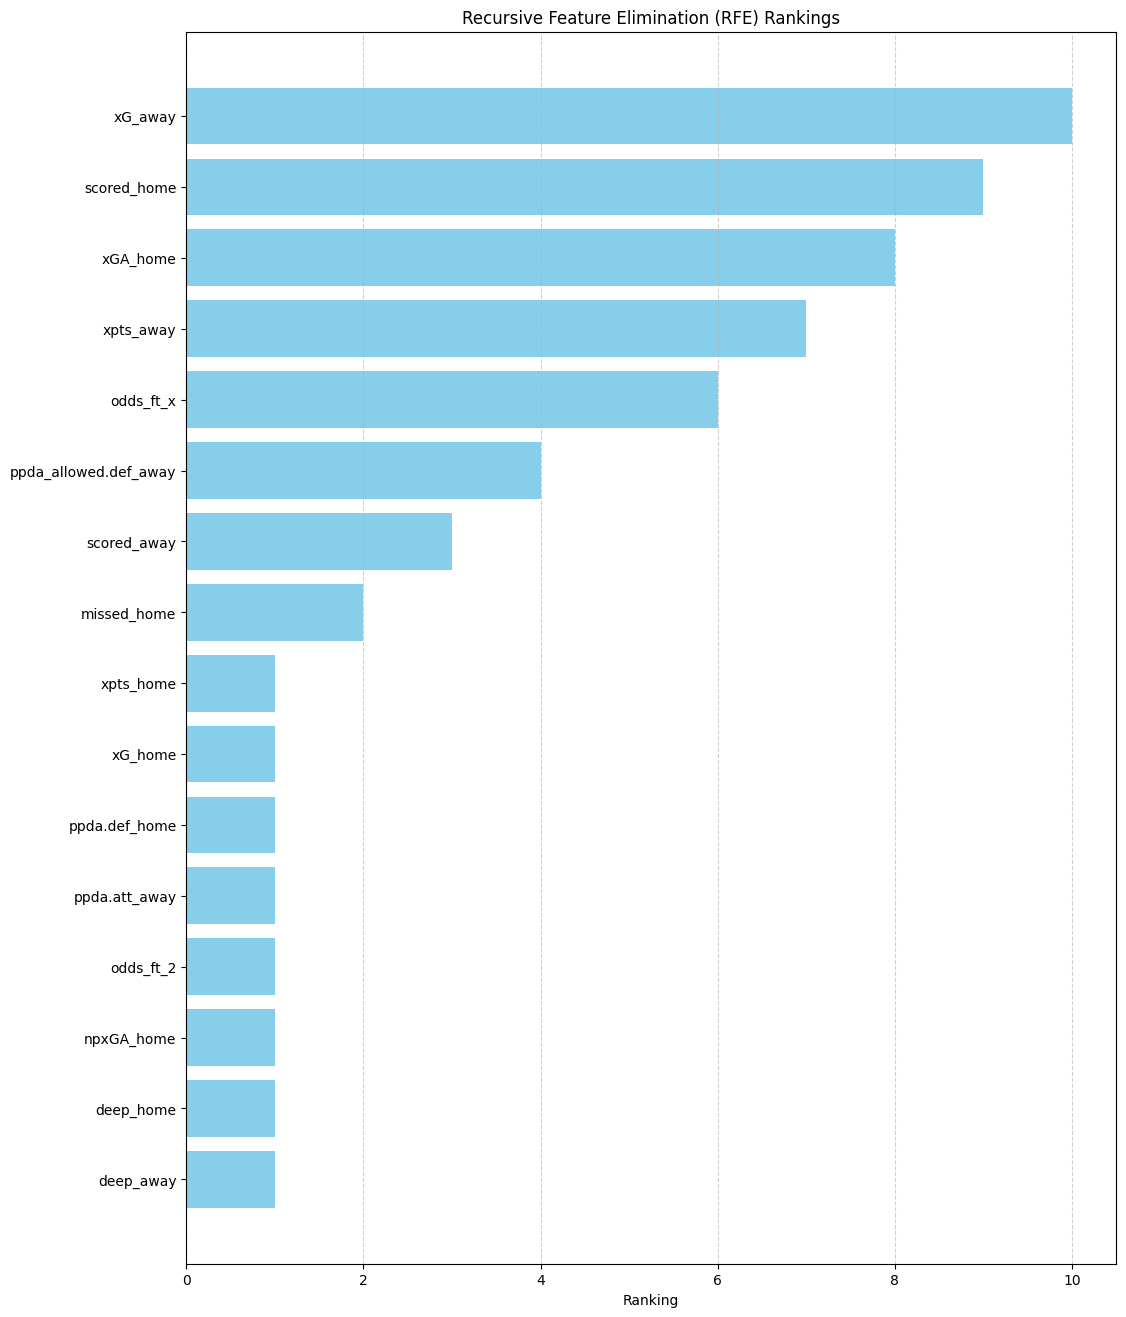

In [42]:
# Sort features based on their ranking
sorted_features = [feature for _, feature in sorted(zip(feature_ranking[:len(selected_columns)], selected_columns))]

# Create a bar plot with adjusted figure size and label rotation
plt.figure(figsize=(12, 16))
plt.barh(range(len(sorted_features)), np.sort(feature_ranking[:len(selected_columns)]), align='center', color='skyblue')
plt.yticks(range(len(sorted_features)), sorted_features, rotation=0, ha='right')  # Rotate labels
plt.xlabel('Ranking')
plt.title('Recursive Feature Elimination (RFE) Rankings')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


The plot provides a visual representation of the importance of each feature according to the RFE algorithm.The lower the rank, the more important the feature is considered by the RFE algorithm.

## **Models**

### Introduction to Linear Regression

Our target variable, TotalGoalCounts, is numerical, making it suitable for linear regression modeling. To establish a baseline performance, we will commence with a simple linear regression model. As we progress, we will fine-tune and explore more sophisticated models to enhance predictive accuracy.

### Model Selection Criteria

We will explore various regression models tailored for handling numerical data, including Support Vector Regression (SVR), Random Forest Regression, and Deep Neural Networks.

### Performance Evaluation Metrics

We have chosen Mean Absolute Error (MAE) as our primary performance evaluation metric. MAE quantifies the average absolute difference between the predicted and actual values, providing a robust measure of prediction accuracy. Notably, MAE is less sensitive to outliers, making it well-suited for scenarios where extreme values might otherwise disproportionately influence the assessment of model performance.

## **Baseline Model using our selected features**

Utilizing the features selected through Recursive Feature Elimination (RFE), we construct a baseline linear regression model. The coefficients and intercept of the model are extracted for examination. Subsequently, predictions are made on the test set, and the Mean Absolute Error (MAE) is computed to evaluate the model's performance.

### Baseline Model Training with Selected Features

In [43]:
# Retrieve the selected feature indices from RFE
selected_feature_indices = rfe.support_

# Extract the selected features for both the training and test sets
selected_features = X_train_scaled[:, selected_feature_indices]
selected_features_test = X_test_scaled[:, selected_feature_indices]

# Create a Linear Regression model
lr_baseline_model = LinearRegression()

# Fit the model on the selected features and target variable (training set)
baseline_model = lr_baseline_model.fit(selected_features, y_train)

# Obtain the coefficients and intercept of the baseline model
coefficients = baseline_model.coef_
intercept = baseline_model.intercept_

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(selected_features_test)

# Evaluate the model performance using Mean Absolute Error (MAE)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test,y_pred_baseline)
rmse_baseline = sqrt(mse_baseline)

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print()
print("Intercept:", intercept)

# Display the Metrics on the test set
print()
print("Mean Absolute Error on Test Data (Baseline):", mae_baseline)
print("Mean Squared Error on Test Data (Baseline):" , mse_baseline)
print("Root Mean Squared Error on Test Data(Baseline):", rmse_baseline)

Coefficients: [[ 0.05661965  0.02060851 -0.04656422  0.06943717  0.11922889 -0.07682066
   0.01942423  0.03078153 -0.05511348 -0.03384129  0.04667588  0.14515908
  -0.04140333 -0.02516446  0.02677809  0.02227513]]

Intercept: [1.21859112]

Mean Absolute Error on Test Data (Baseline): 0.39131460830918824
Mean Squared Error on Test Data (Baseline): 0.2370493610084676
Root Mean Squared Error on Test Data(Baseline): 0.4868771518653012


## Visualizations

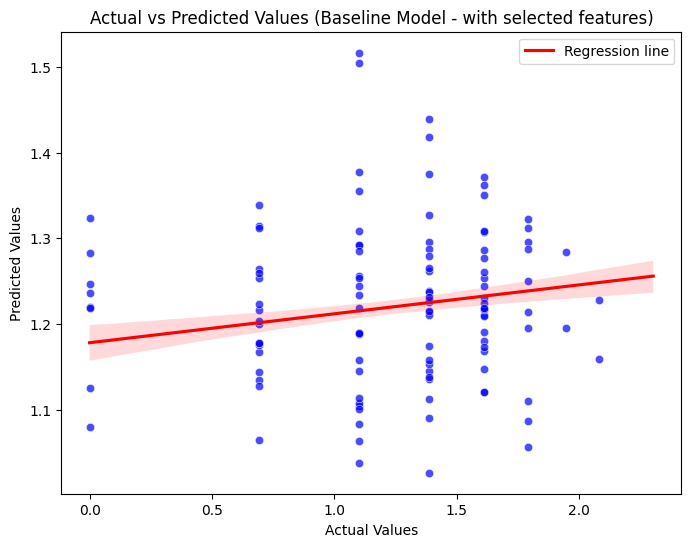

In [44]:
# Convert y_pred_baseline to a Pandas DataFrame with a single column
y_pred_baseline_df = pd.DataFrame(y_pred_baseline, columns=['totalGoalCount'])


# Extract the 'totalGoalCount' column from y_test
y_test_1d = y_test['totalGoalCount']

# Extract the 'totalGoalCount' column from y_pred_baseline_df
y_pred_baseline_1d = y_pred_baseline_df['totalGoalCount']

# Set up the plot
plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x=y_test_1d, y=y_pred_baseline_1d, color='blue', alpha=0.7)


# Add a regression line (optional)
sns.regplot(x=y_test_1d, y=y_pred_baseline_1d, scatter=False, color='red',label = "Regression line")

# Customize labels and title
plt.title('Actual vs Predicted Values (Baseline Model - with selected features)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.legend()
plt.show()

The Mean Absolute Error (MAE) of approximately 0.39 suggests that, on average, the predictions of total goal counts deviate by approximately 1 goal from the actual values.The scatter plot visualization reinforces this observation, as the points exhibit a noticeable deviation from the regression line.

To improve on our model's performance, we will apply Ridge penalization, chosen for its property of not setting the coefficients to zero. It's noteworthy that we've already conducted feature selection using Recursive Feature Elimination (RFE).

## **Ridge Regression**

### Hyperparameter Tuning

In [45]:
# Define the Ridge model
tuned_ridge_model = Ridge()

# Define the hyperparameter grid for Ridge
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'random_state': [42],
    'max_iter': [100, 500, 1000, 2000],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Create the GridSearchCV object for Ridge
grid_search_ridge = GridSearchCV(estimator=tuned_ridge_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the grid search to the data
grid_search_ridge.fit(selected_features, y_train)

# Get the best hyperparameters for Ridge
best_params_ridge = grid_search_ridge.best_params_
print("Best Hyperparameters for Ridge:", best_params_ridge)

# Get the best Ridge model
best_ridge_model = grid_search_ridge.best_estimator_


# Predict using the best Ridge model
y_pred_ridge = best_ridge_model.predict(selected_features_test)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = sqrt(mse_ridge)

print()
print("Mean Absolute Error on Test Data (Ridge):", mae_ridge)
print("Mean Squared Error on Test Data (Ridge):", mse_ridge)
print("Root Mean Squared Error on Test Data(Ridge):", rmse_ridge)

Best Hyperparameters for Ridge: {'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 100, 'random_state': 42, 'tol': 0.0001}

Mean Absolute Error on Test Data (Ridge): 0.3913146059374363
Mean Squared Error on Test Data (Ridge): 0.23704935315108172
Root Mean Squared Error on Test Data(Ridge): 0.4868771437961344


### Performance Evaluation

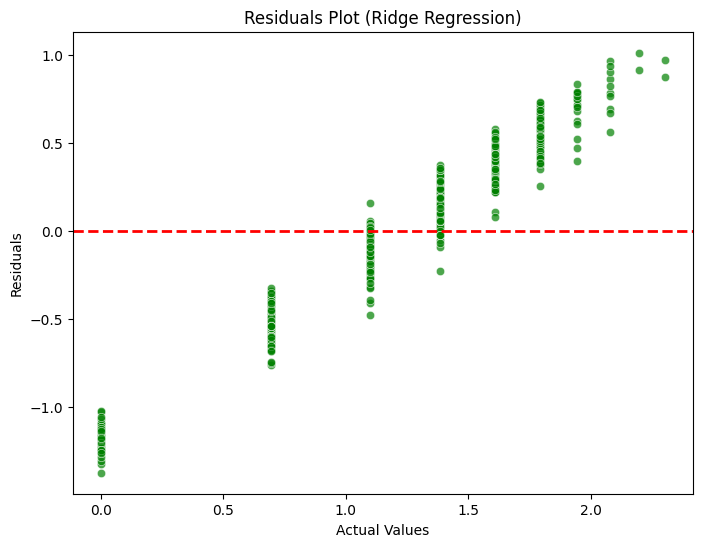

In [46]:
# Calculate residuals
residuals_ridge = y_test - y_pred_ridge


# Set up the plot
plt.figure(figsize=(8, 6))

# Create a scatter plot of residuals
sns.scatterplot(x=y_test['totalGoalCount'], y=residuals_ridge['totalGoalCount'], color='green', alpha=0.7)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Customize labels and title
plt.title('Residuals Plot (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()



Despite optimizing the hyperparameters of the Ridge model, including an alpha value of 10.0, fit_intercept set to True, maximum iterations of 100, a random state of 42, and a tolerance of 0.0001, no noticeable improvement was observed.

From the residual plot,the model seems to under predict as the actual values increases.The predicted values are less than the actual values hence higher resiual values.

In pursuit of enhancing model performance, we will now explore the application of a Random Forest Regressor, known for its effectiveness in capturing complex relationships and exhibiting robust performance in various scenarios.


## **Random Forest Regressor Model**

### Hyperparameter Tuning

In [47]:
# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Use GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train_scaled, y_train.values.ravel())

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = sqrt(mse_rf)

print("Best Hyperparameters:", best_params_rf)
print()
print("Mean Absolute Error on Test Data (RandomForest Regressor):", mae_rf)
print("Mean Squared Error on Test Data (RandomForest Regressor):", mse_rf)
print("Root Mean Squared Error on Test Data(RandomForest Regressor):", rmse_rf)



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Mean Absolute Error on Test Data (RandomForest Regressor): 0.39027795385290714
Mean Squared Error on Test Data (RandomForest Regressor): 0.2376365542258169
Root Mean Squared Error on Test Data(RandomForest Regressor): 0.4874797987874132


### Feature Importance Analysis

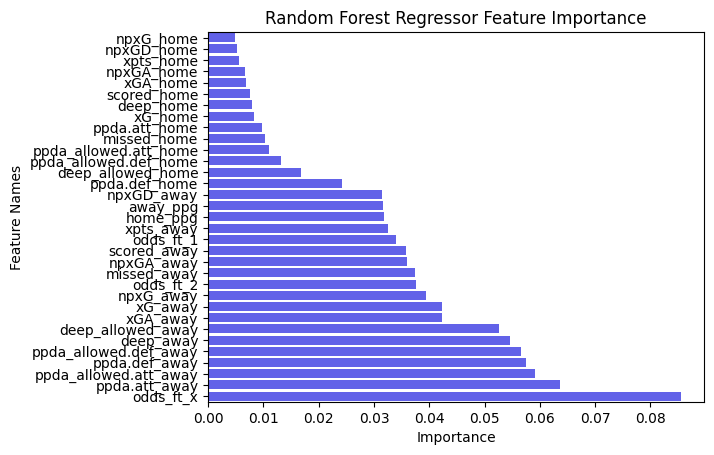

In [48]:
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Sort the indices based on feature importances
indices = np.argsort(feature_importances)

# Plot the sorted feature importances
sns.barplot(x=feature_importances[indices], y=feature_names[indices], color='blue', alpha=0.7)
plt.title('Random Forest Regressor Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.show()

### Performance Evaluation

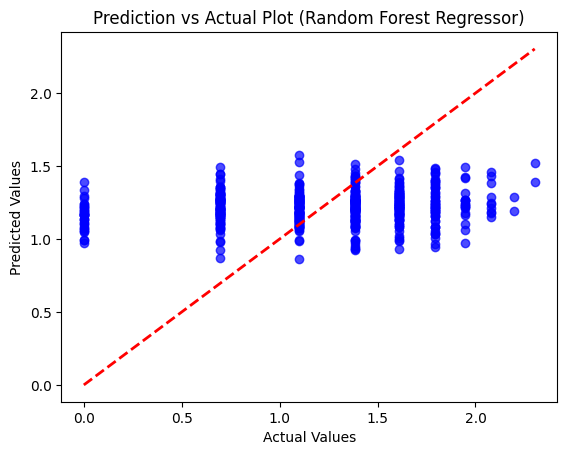

In [49]:
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7)
plt.plot([min(y_test['totalGoalCount']), max(y_test['totalGoalCount'])], [min(y_test['totalGoalCount']), max(y_test['totalGoalCount'])], linestyle='--', color='red', linewidth=2)
plt.title('Prediction vs Actual Plot (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


The Random Forest model demonstrates a marginal improvement, reducing the Mean Absolute Error (MAE) from 0.3913 to 0.3903.

From the visualization,the model appears to have some predictive power, as many of the predictions are close to the line of perfect prediction. However, there is noticeable variability in the predictions, especially for actual values with more density. The model seems to under predict with more values below the regression line.

## **XGB Model**

### Hyperparameter Tuning

In [50]:
# Create the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train,
                   eval_set=[(X_test_scaled, y_test)],
                   eval_metric='mae',
                   early_stopping_rounds=10,
                   verbose=True)

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
rmse_xgb = sqrt(mse_xgb)

print()
print("Mean Absolute Error on Test Data (XGB):", mae_xgb)
print("Mean Squared Error on Test Data (XGB):", mse_xgb)
print("Root Mean Squared Error on Test Data(XGB):", rmse_xgb)



[0]	validation_0-mae:0.39873
[1]	validation_0-mae:0.39863
[2]	validation_0-mae:0.39849
[3]	validation_0-mae:0.39840
[4]	validation_0-mae:0.39825
[5]	validation_0-mae:0.39807
[6]	validation_0-mae:0.39802
[7]	validation_0-mae:0.39787
[8]	validation_0-mae:0.39785
[9]	validation_0-mae:0.39775
[10]	validation_0-mae:0.39769
[11]	validation_0-mae:0.39755
[12]	validation_0-mae:0.39739
[13]	validation_0-mae:0.39727
[14]	validation_0-mae:0.39713
[15]	validation_0-mae:0.39705
[16]	validation_0-mae:0.39702
[17]	validation_0-mae:0.39687
[18]	validation_0-mae:0.39676
[19]	validation_0-mae:0.39669
[20]	validation_0-mae:0.39657
[21]	validation_0-mae:0.39651
[22]	validation_0-mae:0.39645
[23]	validation_0-mae:0.39634
[24]	validation_0-mae:0.39618
[25]	validation_0-mae:0.39599
[26]	validation_0-mae:0.39591
[27]	validation_0-mae:0.39588
[28]	validation_0-mae:0.39578
[29]	validation_0-mae:0.39570
[30]	validation_0-mae:0.39564
[31]	validation_0-mae:0.39557
[32]	validation_0-mae:0.39549
[33]	validation_0-ma

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-mae:0.39541
[36]	validation_0-mae:0.39526
[37]	validation_0-mae:0.39524
[38]	validation_0-mae:0.39507
[39]	validation_0-mae:0.39494
[40]	validation_0-mae:0.39482
[41]	validation_0-mae:0.39461
[42]	validation_0-mae:0.39451
[43]	validation_0-mae:0.39451
[44]	validation_0-mae:0.39442
[45]	validation_0-mae:0.39434
[46]	validation_0-mae:0.39424
[47]	validation_0-mae:0.39406
[48]	validation_0-mae:0.39402
[49]	validation_0-mae:0.39395
[50]	validation_0-mae:0.39386
[51]	validation_0-mae:0.39368
[52]	validation_0-mae:0.39363
[53]	validation_0-mae:0.39360
[54]	validation_0-mae:0.39355
[55]	validation_0-mae:0.39342
[56]	validation_0-mae:0.39330
[57]	validation_0-mae:0.39321
[58]	validation_0-mae:0.39310
[59]	validation_0-mae:0.39303
[60]	validation_0-mae:0.39291
[61]	validation_0-mae:0.39285
[62]	validation_0-mae:0.39287
[63]	validation_0-mae:0.39276
[64]	validation_0-mae:0.39279
[65]	validation_0-mae:0.39262
[66]	validation_0-mae:0.39253
[67]	validation_0-mae:0.39245
[68]	valid

### Feature Importance Analysis

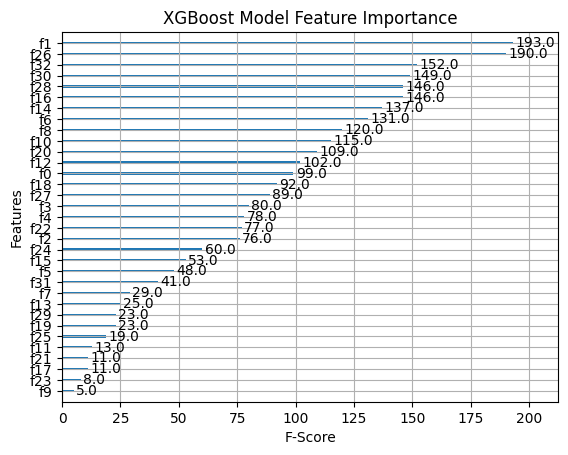

In [51]:
plot_importance(best_xgb_model,show_values = True)
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.title('XGBoost Model Feature Importance')
plt.show()

### Tree Visualization

Number of Trees Used: 99


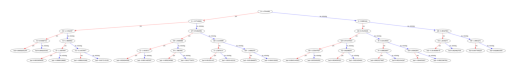

In [52]:
# Access the number of trees used during early stopping
num_trees_used = best_xgb_model.get_booster().best_iteration
print(f'Number of Trees Used: {num_trees_used}')

# Plot a tree from the final iteration (you can adjust the num_trees parameter)
plot_tree(best_xgb_model, num_trees=num_trees_used-1, rankdir='TB')
plt.show()


## **SVR Model**

### Hyperparameter Tuning

In [53]:
# Create the SVR model
svr_model = SVR()

# Define hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2]
}

y_train_array = y_train.values.ravel()
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(selected_features, y_train_array)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(selected_features, y_train_array)

# Make predictions on the test set
y_pred_svr = best_svr_model.predict(selected_features_test)

# Display the best hyperparameters
print('Best Hyperparameters:', best_params)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = sqrt(mse_svr)

print()
print("Mean Absolute Error on Test Data (SVR):", mae_svr)
print("Mean Squared Error on Test Data (SVR):", mse_svr)
print("Root Mean Squared Error on Test Data(SVR):", rmse_svr)

Best Hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Mean Absolute Error on Test Data (SVR): 0.386448189999399
Mean Squared Error on Test Data (SVR): 0.24088082729070368
Root Mean Squared Error on Test Data(SVR): 0.4907961158064555


### Performance Evaluation

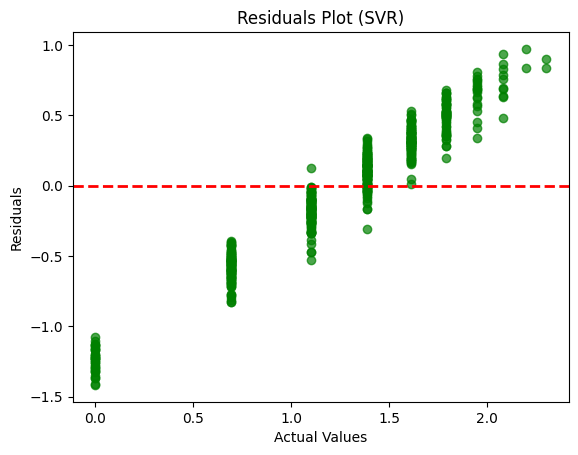

In [54]:
residuals_svr = y_test.to_numpy().reshape(-1,) - y_pred_svr

plt.scatter(y_test, residuals_svr, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


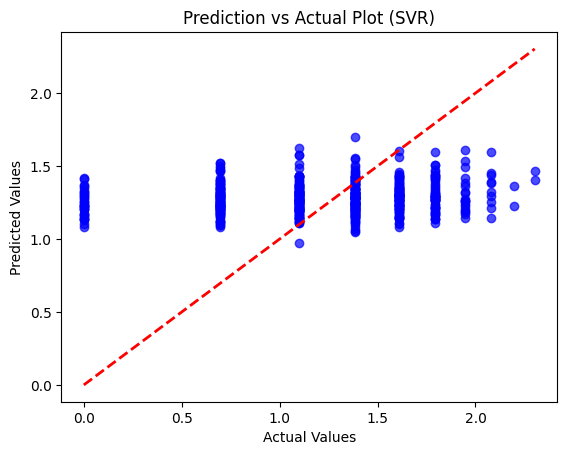

In [55]:
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.7)
plt.plot([min(y_test['totalGoalCount']), max(y_test['totalGoalCount'])], [min(y_test['totalGoalCount']), max(y_test['totalGoalCount'])], linestyle='--', color='red', linewidth=2)
plt.title('Prediction vs Actual Plot (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


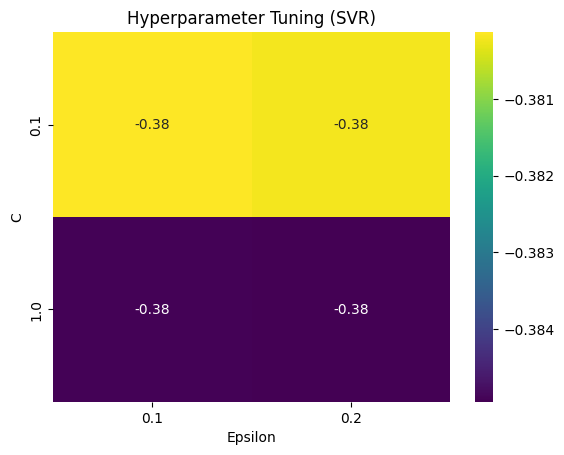

In [56]:
# Extract results for visualization
results = pd.DataFrame(grid_search.cv_results_)
# Visualize results, for example, using a heatmap
sns.heatmap(results.pivot_table(index='param_C', columns='param_epsilon', values='mean_test_score'), annot=True, cmap='viridis')
plt.title('Hyperparameter Tuning (SVR)')
plt.xlabel('Epsilon')
plt.ylabel('C')
plt.show()

There is a slight improvement of the MAE from 0.3901 to 0.3864. This is evidence from the residual plot and 'Prediction vs Actual' plot with more points near the regression line. However the model seems to underpredict values as the actual values increase as well as they decrease.

## **Deep Neural Networks**

### Hyperparameter Tuning

In [57]:
# Build the deep neural network model
dn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
dn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
dn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_dn = dn_model.predict(X_test_scaled)


# Evaluate the model
mae_dn = mean_absolute_error(y_test, y_pred_dn)
mse_dn = mean_squared_error(y_test, y_pred_dn)
rmse_dn = sqrt(mse_dn)

dn_model.summary()


print()
print("Mean Absolute Error on Test Data (DN):", mae_dn)
print("Mean Squared Error on Test Data (DN):", mse_dn)
print("Root Mean Squared Error on Test Data(DN):", rmse_dn)

Epoch 1/50
57/57 [==============================] - 4s 7ms/step - loss: 0.6648 - val_loss: 0.2880
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4087 - val_loss: 0.2903
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3609 - val_loss: 0.2858
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3217 - val_loss: 0.2682
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3197 - val_loss: 0.2770
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3145 - val_loss: 0.3040
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3015 - val_loss: 0.2727
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3032 - val_loss: 0.2612
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2881 - val_loss: 0.2587
Epoch 10/50
57/57 [==============================] - 0s 3ms/step - loss: 0.2827 - val_loss: 0.2600
Epoch 11/50
57/57 [

### Performance Evaluation

Epoch 1/50
57/57 [==============================] - 0s 7ms/step - loss: 0.2201 - val_loss: 0.2531
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2136 - val_loss: 0.2536
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2152 - val_loss: 0.2560
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.2171 - val_loss: 0.2560
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2136 - val_loss: 0.2575
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2171 - val_loss: 0.2541
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2144 - val_loss: 0.2553
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2119 - val_loss: 0.2563
Epoch 9/50
57/57 [==============================] - 0s 3ms/step - loss: 0.2070 - val_loss: 0.2623
Epoch 10/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2144 - val_loss: 0.2616
Epoch 11/50
57/57 [

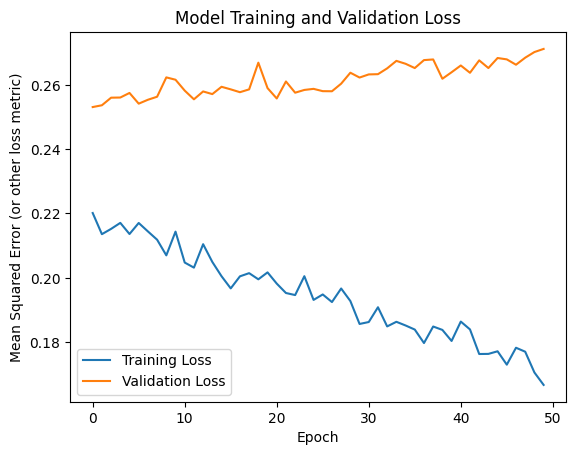

In [58]:
history = dn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (or other loss metric)')
plt.legend()
plt.show()



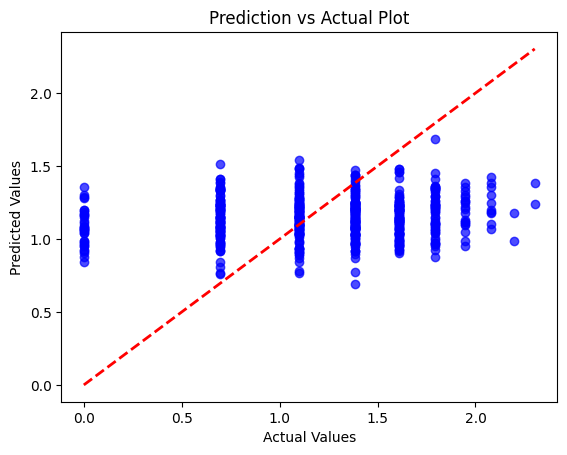

In [59]:
plt.scatter(y_test, y_pred_dn, color='blue', alpha=0.7)
plt.plot([min(y_test['totalGoalCount']), max(y_test['totalGoalCount'])], [min(y_test['totalGoalCount']), max(y_test['totalGoalCount'])], linestyle='--', color='red', linewidth=2)
plt.title('Prediction vs Actual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


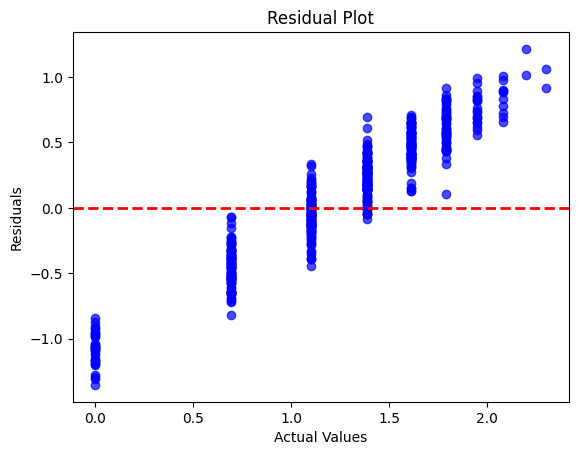

In [60]:
residuals = y_test - y_pred_dn

plt.scatter(y_test, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


As the number of epochs increases, a growing divergence between training and validation loss suggests that the model is becoming overly sensitive to the nuances, noise, and outliers present in the training data. It indicates that the model is not effectively generalizing to new, unseen data.

## **Conclusion**

### Model Comparison


| Model                  | MAE    | MSE    | RMSE   |
|------------------------|--------|--------|--------|
| Linear Regression      | 0.3913 | 0.2370 | 0.4869 |
| Ridge                  | 0.3913 | 0.2370 | 0.4869 |
| RandomForest Regressor | 0.3903 | 0.2376 | 0.4875 |
| XGB                    | 0.3909 | 0.2381 | 0.4880 |
| SVR                    | 0.3864 | 0.2409 | 0.4908 |
| DN                     | 0.4068 | 0.2440 | 0.4940 |

The SVR model stands out with the lowest Mean Absolute Error (MAE) of 0.3864 among all models. A lower MAE indicates superior predictive accuracy, and SVR achieves the smallest average absolute difference between predicted and actual values.

Although the RandomForest Regressor also performs well with an MAE of 0.3903, the marginally lower MAE of SVR suggests it as the top-performing model for this specific evaluation.

### Recommendations

1. **Model Performance Analysis:**
   - Visual inspection reveals that the models tend to underpredict values as actual values increase, indicating potential underfitting.
   - The predictive power of the models is noticeable, as evidenced by the distribution of points around the regression line.
   - The points exhibit a distribution along horizontal lines, suggesting that the actual values might be discrete or categorical.

2. **Heteroscedasticity:**
   - Presence of heteroscedasticity implies a constant error across all levels of actual values. Addressing this issue could enhance model accuracy.

3. **Further Model Refinement:**
   - Conduct additional fine-tuning of hyperparameters to improve the models' overall performance.

4. **Outlier Handling:**
   - The presence of outliers significantly affects model performance. Implement robust strategies for identifying and handling outliers.

5. **Data Augmentation:**
   - Add more data to enhance the models' learning and generalization capabilities, potentially improving performance on unseen data.

Continued refinement, addressing specific model weaknesses, and incorporating more data will contribute to the overall improvement of the models' predictive capabilities.